In [13]:
pip install matplotlib

  Using cached contourpy-1.2.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 8.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.8 MB/s eta 0:00:000:00:010:00:01:01
Using cached contourpy-1.2.0-cp39-cp39-macosx_11_0_arm64.whl (242 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
Using cached kiwisolver-1.4.5-cp39-cp39-macosx_11_0_arm64.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.5 MB/s eta 0:00:00m eta 0:00:010:01:01
Using

## Define our embedding function
Check out the openai API if you have issues: https://platform.openai.com/docs/api-reference

In [8]:
from openai import OpenAI
import numpy as np
import os
from dotenv import load_dotenv

# Load the API key from the .env file
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)    # Initialize the OpenAI client


def get_embeddings_batch(inputs):
    # Call the OpenAI API to get the embeddings for a batch of inputs
    response = client.embeddings.create(
        input=inputs,
        model="text-embedding-3-large"
    )

    # Extract the embeddings
    embeddings = np.array([item.embedding for item in response.data])
    return embeddings

# example
inputs = ["Hello, world!", "How are you?"]
embeddings = get_embeddings_batch(inputs)
print(embeddings)


[[-0.00583036 -0.02408076 -0.02201979 ...  0.00855378 -0.01205587
   0.00108666]
 [ 0.00584277 -0.0009781  -0.02867955 ...  0.00303341 -0.02772816
   0.01424326]]


## Turn our data into embeddings

In [16]:
example_data = ["Hello, world!", "How are you?", "I'm doing great, thanks!", "biology", "chemistry", "physics", "math", "calculus", "mathematics"]

embeddings = get_embeddings_batch(example_data)

## Reduce to 2 dimensions
Check out this guide for how umap works: https://pair-code.github.io/understanding-umap/

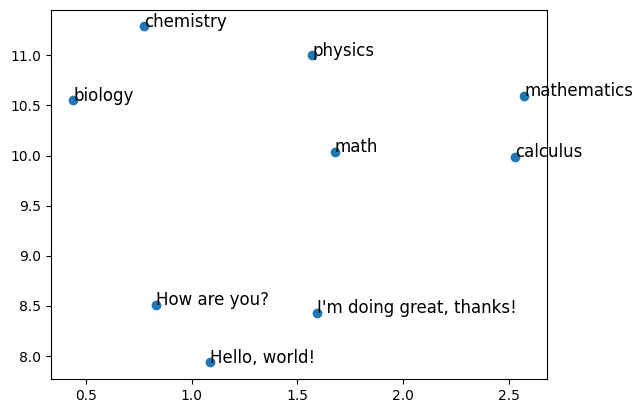

In [21]:
from umap import UMAP
import matplotlib.pyplot as plt


# set hyperparameters for umap. try playing around with them
n_neighbors = 4
min_dist = 0.2
n_components = 2
metric = 'cosine'

# Initialize the UMAP model
umap = UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric
)

# Fit the UMAP model to the embeddings
reduced_embeddings = umap.fit_transform(embeddings)

# Plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, text in enumerate(example_data):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], text, fontsize=12)
plt.show()
